## <Center><font color=blue>Homework Assignment 2</font></center>
###  <Center><font color=blue>Due Saturday, August 8</font></center>

This Homework Assignment for Class 2 uses 3 datasets. The datasets are read in automatically for you and data descriptions are included. Each is read in by a new 'pickle method', the advantage of which is that it preserves modifications done to a DataFrame, eliminating the need to read in a '.csv' file and modifying it for analysis. They datasets are:

1. A **credit** dataset that can be used to develop a credit rating.
2. A Dow Jones Industrial Average *TimeSeries* **djia_ret** of daily returns from 1/3/2011 to 7/27/2018.
3. An **auto** DataFrame that has various variables for cars manufactured between 1970 and 1982.

There are 15 questions (some of which request written answers) for a total of 18 points.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit = pd.read_pickle("./credit.pkl")
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


The *credit* DataFrame was created by a credit card company to investigate creditworthiness of existing and potential customers. It has information on 400 customers, most of it either publicly available data or personal information that can be obtained either in the application process or purchased from companies that maintain credit histories. The credit card company wants to build a rating system for those it insures in order that its fees for services are sufficient to maintain its profitability.

In [4]:
djia_ret = pd.read_pickle('djia_ret.pkl')
print(djia_ret.iloc[:,0:5].describe())
print(djia_ret.iloc[:,0:5].head())
djia_ret.columns

              aapl          axp           ba          cat         csco
count  1909.000000  1909.000000  1909.000000  1909.000000  1909.000000
mean      0.000777     0.000441     0.000868     0.000202     0.000386
std       0.015779     0.013673     0.014529     0.016382     0.015247
min      -0.131885    -0.128981    -0.093531    -0.096740    -0.152639
25%      -0.006934    -0.005809    -0.006628    -0.008045    -0.006280
50%       0.000494     0.000689     0.001192     0.000169     0.000334
75%       0.009367     0.007375     0.008926     0.008872     0.007626
max       0.085022     0.086440     0.094214     0.077950     0.147993
                aapl       axp        ba       cat      csco
date                                                        
2011-01-03  0.005205  0.012593  0.008100 -0.004684  0.001463
2011-01-04  0.008147  0.024498  0.008035  0.008607  0.012110
2011-01-05 -0.000809 -0.006907  0.019372 -0.010422  0.008629
2011-01-06  0.007136 -0.008306  0.008395  0.002029  0.00

Index(['aapl', 'axp', 'ba', 'cat', 'csco', 'cvx', 'dwdp', 'dis', 'ge', 'gs',
       'hd', 'ibm', 'intc', 'jnj', 'jpm', 'ko', 'mcd', 'mmm', 'mrk', 'msft',
       'nke', 'pfe', 'pg', 'trv', 'unh', 'utx', 'v', 'vz', 'wmt', 'xom'],
      dtype='object')

The *djia_ret* DataFrame displays daily returns for the 30 stocks in the *Dow Jones Industrial Average* for the 1909 trading days between 2011-01-03 and 2018-07-27. A **daily return** $r_i$ for the $i$-th day is defined as the logarithmic difference between its closing price on day $i+1$ and day $i$  
  
<center>$r_i = log(p_{i+1}) - log(p_i) = log \left(\frac{p_{i+1}}{p_i} \right)$. </center>

Note that $r_i > 0$ if $p_{i+1} > p_i$ and $r_i < 0$ if $p_{i+1} < p_i$, meaning that if stock price advances the day after day $i$ the return is positive, and if it declines, negative.

Each row of this DataFrame shows results of prior year advertising for a particular geographic area. Each row has the prior year expenditures for TV, Radio and Newspaper advertising in its area and the actual sales (in thousands of units) for that area. The company wants to use this data to create a budget for next year, and a basic question is: does advertising (apparently) lead to greater sales? What is the relationship?  

In [5]:
auto = pd.read_pickle('./auto.pkl')
print(auto.describe())
auto.head()

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The *auto* DataFrame has information on 392 makes of cars manufactured between 1970 and 1982. It is intended as a data set that can illustrate data science analytics.  
  
The table below describes the meanings of the variables.

| Column Name | Description |
| --- | --- |
| mpg | miles per gallon |
| cylinders | Number of cylinders between 4 and 8 |
| displacement | Engine displacement (cu. inches) |
| horsepower | Engine horsepower |
| weight | Vehicle weight (lbs.) |
| acceleration | Time to accelerate from 0 to 60 mph (sec.) |
| year | Model year (modulo 100) |
| origin | Origin of car (1. American, 2. European, 3. Japanese) |
| name | Vehicle name |  
  
Note that in the pandas '.describe()' function, the same statistics were used for all numerical variables and the single text variable ('name') was excluded. But the relevance of some of these statistics is questionable. For example, the mean of the 'origin' variable is 1.576531 and its standard deviation is 0.805518. But a different encoding of origin, say as 1 -> 5, 2 -> -4 and 3 -> 0 would give entirely different statistics without changing any of the data's content.


### <font color=blue>Questions 6-11 for the **auto** </font>
The first five questions (Q1 - Q5) use the auto database

In [6]:
# Question 1 (1 point): Produce a table using .describe() for  'mpg' 
#                       by the auto's 'origin'.
#print(auto.loc[:,'mpg'].describe())
auto.groupby('origin')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0
2,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
3,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6


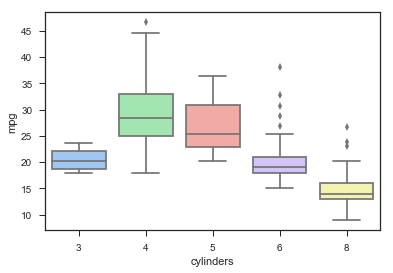

In [7]:
# Question 2 (1 point). Produce boxplots of 'mpg' by 'cylinders'
#plt.boxplot(cylinders.mpg)
sns.set(style='ticks' , palette='pastel')
sns.boxplot(x='cylinders' , y='mpg', data = auto)

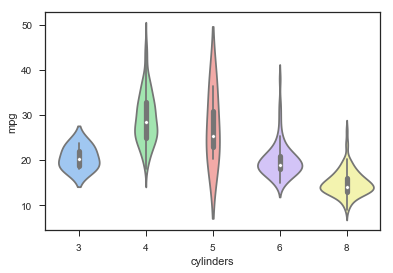

In [8]:
# Question 3 (1 point): Produce violin plots of 'mpg' by 'cylinders'
sns.violinplot(x='cylinders',y='mpg',data=auto)

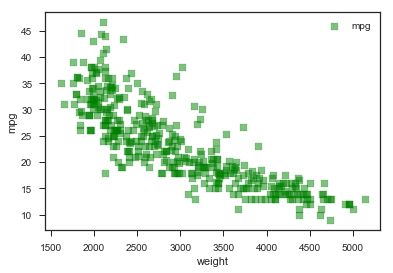

In [9]:
# Question 4 (1 point): Produce a scatter plot of y='mpg' by x = 'weight'
x=auto.weight
y=auto.mpg
plt.xlabel('weight')
plt.ylabel('mpg')
plt.scatter(x,y,c='green',alpha=0.5,marker='s')
plt.legend(numpoints=1)
plt.show()

In [10]:
# Question 5 (1 point): Does the relationship of mpg to weight in the answer to 
#                       Question 4 seem to be linear? (a straighe line relationship)
# Answer in English in this box with comments ('#''s at the beginning of each line)
# No, it's not linear. It's curve.

### <font color=blue>Questions 6-11 for the **djia_ret** TimeSeries</font>

In [11]:
# Question 6 (1 point): Display the correlation matrix for the first 5 
#                       variables of *djia_ret*
djia_ret.iloc[:,0:5].corr()

,aapl,axp,ba,cat,csco
aapl,1.000000,0.278670,0.261643,0.283551,0.257307
axp,0.278670,1.000000,0.498734,0.500906,0.391468
ba,0.261643,0.498734,1.000000,0.536886,0.403644
cat,0.283551,0.500906,0.536886,1.000000,0.441385
csco,0.257307,0.391468,0.403644,0.441385,1.000000


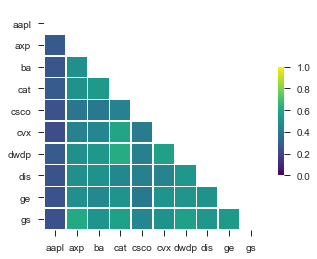

In [12]:
# Question 7 (1 point): Produce a heatmap for the first 10 stocks of 
#                       the TimeSeries of *djia_ret*
# USE cmap = 'viridis'
djia_corr=djia_ret.iloc[:,0:10].corr()
mask = np.zeros_like(djia_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6, 4))
#cmap = 'viridis'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(djia_corr, mask=mask, cmap = 'viridis', vmax=1, vmin=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [25]:
# Question 8 (1 points): In Question 8, what do you think about the color map?
#                       Could it be improved. Answer in this cell using English 
#                       and comment ('#') lines
# I think the color map can't show the correlation well, because these colors are too close and they can't tell the differences.
# if we change the cmap to another color, then the map seems better.

In [14]:
# Question 9 (2 point): For the stock 'msft', display the (1) mean, (2) median, 
#                       (3) standard deviation, (4) MAD, (5) skewness,  
#                       and (6) kurtotis.
[djia_ret['msft'].mean(),
 djia_ret['msft'].median(),
 djia_ret['msft'].std(),
 djia_ret['msft'].mad(),
 djia_ret['msft'].skew(),
 djia_ret['msft'].kurt()]

[0.0007077064268951866,
 0.00031238870156835574,
 0.0142481262489763,
 0.009943370721826826,
 -0.09935978674629849,
 7.944967034379386]

In [27]:
#Question 10 (1 point) Display the IQR without using the .describe() method.
q75, q25 = np.percentile(djia_ret['msft'],[75 , 25])
iqr = q75 -q25
print(iqr)
#print(djia_ret['msft'].describe())
#print(0.007887+0.006585)

0.014472667581663323


In [16]:
# Question 11 (2 points): For the stocks 'jpm' and 'gs', display the (1) covariance, 
#                        (2) correlation, (3) spearman rank correlation and 
#                        (4) Kendall's tau
jpm_gs = djia_ret[['jpm','gs']]
print(jpm_gs.cov())
print('\n')
print(jpm_gs.corr())
print('\n')
import scipy.stats as stats
print(stats.spearmanr(jpm_gs['jpm'],jpm_gs['gs']))
print('\n')
print(stats.kendalltau(jpm_gs['jpm'],jpm_gs['gs']))

          jpm        gs
jpm  0.000251  0.000211
gs   0.000211  0.000259


          jpm        gs
jpm  1.000000  0.827209
gs   0.827209  1.000000


SpearmanrResult(correlation=0.784800622094147, pvalue=0.0)


KendalltauResult(correlation=0.6036896132026863, pvalue=0.0)


### <font color=blue>Questions 12-15 for the 'credit' DataFrame</font>

[138.  45.  53.  47.  48.  32.  21.  11.   3.   2.]
[   0.   199.9  399.8  599.7  799.6  999.5 1199.4 1399.3 1599.2 1799.1
 1999. ]


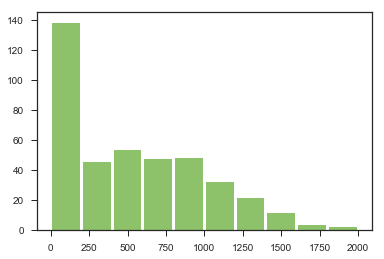

In [31]:
# Question 12 (1 point): Display a histogram for 'Balance' and print using 
#                        output 'n, bins, patches', print the number in each
#                        bin and the cutpoints for each bin.
n, bins, patches = plt.hist(x=credit.Balance, rwidth=0.9, color='#8ec26a') 
print(n)
print(bins)

In [18]:
# Question 13 (1 point): Using the result from   Question 12, answer using 
#                        comments below in this cell
#
# Q1: Is the data right or left skewed?
# Right skewed

# Q2: How many are in the leftmost bin?
# 138

# Q3: What range of Balances define the leftmost bin?
# 0-199.9

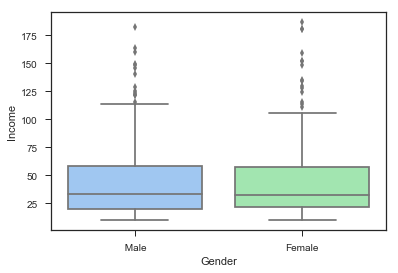

In [19]:
# Question 14 (2 points): Produce a boxplot for 'Income' by 'Gender'
#                         Insert a markdown cell after this one and
#                         answer these questions:
sns.set(style='ticks' , palette='pastel')
sns.boxplot(x='Gender' , y='Income', data = credit)

# Q1: Do you see a Gender related difference in income?
# Male's incomes are in a wider and higher range than female's.

# Q2: What additional information would you ask about this sample?
# How many females and males are accounted in the sample and are their from the same company or industry?

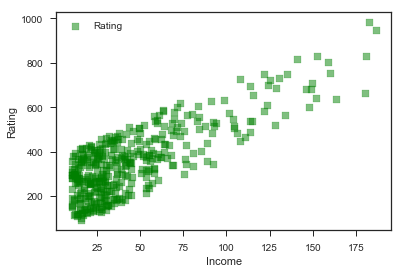

In [22]:
# Question 15 (1 point): Produce a scatter plot of y = 'Rating' vs x = 'Income'
x=credit.Income
y=credit.Rating
plt.xlabel('Income')
plt.ylabel('Rating')
plt.scatter(x,y,c='green',alpha=0.5,marker='s')
plt.legend(loc=2)
plt.show()                      
# Insert a cell below and answer: Do you see evidence of a relationship
#                                 between Rating and Income?

In [21]:
# Yes, it is linear and the higher the income, the higher the rating.